# 3. Diurnal Cycle

This notebook aims at inroducing new users on how to use the PCDMI diurnal cycle drivers.

[This diagram](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/misc/diurnal/Diurnal%20Cycle%20Diagram.pdf) shows how various drivers are linked together.

To run the following demo, it is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb). For this tutorial we will be using 3 years worth of 3-hourly data resampled to a 5x5 grid.

The following cell loads the demo input and output directories set in the download notebook.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
demo_output_directory

'demo_output'

## Daily Means

Like all other drivers in the PCMDI Metrics Package, Diurnal Cycle relies on parameter input files.

Our first driver starts from CMIP5 data and computes the daily means.

In [3]:
with open("basic_diurnal_compute_daily_mean.py") as f:
    print(f.read())

# output directory
results_dir = 'demo_output/diurnal/nc'

# input directory
modpath = 'demo_data/misc_demo_data/atm/3hr/pr/'

# filenames template
filename_template = 'pr_3hr_%(model)_%(experiment)_%(realization)_5x5_1997-1999.nc'

# model to use
model = 'IPSL-CM5A-LR'
experiment = 'historical'
realization = 'r1i1p1'

# Month to use
month = 7

# Period
firstyear = 1997 # included
lastyear = 1999  # included

# Number of workers
num_workers = 4



Now to run this simply call the driver:
```
computeStdOfDailyMeans.py -p basic_diurnal_compute_daily_mean.py
```

In [4]:
%%bash
computeStdOfDailyMeans.py -p basic_diurnal_compute_daily_mean.py

SKIPPING: []
FILES: ['demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1b8ca5240>]
Data source: IPSL-CM5A-LR
Opening demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc
Data source: IPSL-CM5A-LR
Opening demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc
Calendar type: noleap
Year 1997:
Start time: 1997-07-01 00:00:00
Finish time: 1997-08-01 00:00:00
Reading pr from demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc for time interval 1997-07-01 00:00:00 to 1997-08-01 00:00:00
Year 1998:
Start time: 1998-07-01 00:00:00
Finish time: 1998-08-01 00:00:00
Reading pr from demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc for time interval 1998-07-01 00:00:00 to 1998-08-01 00:00:00
Year 1999:
Start time: 1999-07-01 00:00:00
Finish time: 

This generates a netcdf file `pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc` which contains the daily standard deviation at each cell.

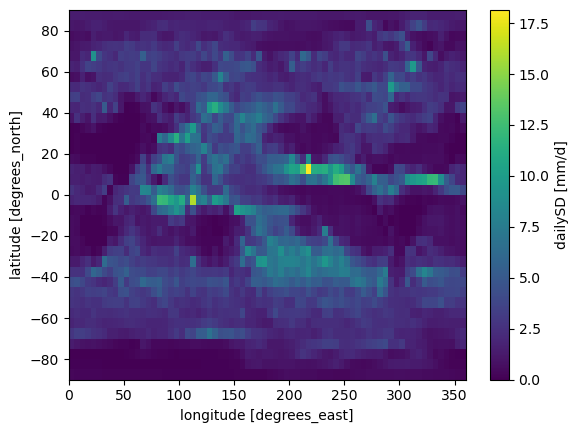

In [5]:
import xarray as xr

ds = xr.open_dataset(demo_output_directory + "/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc")
ds.dailySD.plot()
ds.close()

Looking at our diagram, the next driver to run is the one computing the mean of the standard deviation from daily means over a region of interest. First we open the parameter file.

In [6]:
with open("basic_diurnal_std_daily_mean.py") as f:
    print(f.read())

# output directory
results_dir = 'demo_output/diurnal/json'

# input directory which is actually the output of previous driver
modpath = 'demo_output/diurnal/nc'

# filenames template
filename_template = 'pr_%(model)_Jul_%(firstyear)-%(lastyear)_std_of_dailymeans.nc'

# model to use
model = 'IPSL-CM5A-LR'
experiment = 'historical'
realization = 'r1i1p1'

# Month to use
month = 7

# Period
firstyear = 1997 # included
lastyear = 1999  # included

# Latitudes/longitudes to use
lat1 = -50.
lat2 = 50.
lon1 = 0.
lon2 = 360.

# Name
region_name = "TRMM"

# Number of workers
num_workers = 4



Now to run this simply call the driver
```
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py
```

In [7]:
%%bash
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py

TEMPLATE NAME: pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc
Preparing to write output to JSON file ...
Initializing dictionary of statistical results ...
['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1ba96dcf0>]
Specifying latitude / longitude domain of interest ...
Reading demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc


2025-07-26 00:23:17,343 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-26 00:23:17,343 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Shape = (20, 72)
units = mm/d
Finding RMS area-average ...
For IPSL-CM5A-LR in Jul, average variance of daily values = ( 3.92 mm/d)^2
Writing output to JSON file ... {'IPSL-CM5A-LR': {'TRMM': 3.916317765685017}}
REG MASK: {}


INFO::2025-07-26 00:23::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json
2025-07-26 00:23:22,005 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json
2025-07-26 00:23:22,005 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json


done


This generates a json file: `pr_Jul_1997_1999_std_of_dailymeans.json`

OPTIONAL: You could also append a new region to this json file by overwritting some of our parameters from the command line. This example creates results for the tropics instead of the whole globe.

In [8]:
%%bash
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py \
--region_name=TROPICS \
--lat1=-30. \
--lat2=30. \
--lon1=0. \
--lon2=360 \
--append

TEMPLATE NAME: pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc
Preparing to write output to JSON file ...
['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1ba839c90>]
Specifying latitude / longitude domain of interest ...
Reading demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc


2025-07-26 00:23:34,225 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-26 00:23:34,225 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Shape = (12, 72)
units = mm/d
Finding RMS area-average ...
For IPSL-CM5A-LR in Jul, average variance of daily values = ( 3.89 mm/d)^2
Writing output to JSON file ... {'IPSL-CM5A-LR': {'TRMM': 3.916317765685017, 'TROPICS': 3.890735448100127}}
REG MASK: {'TRMM': {'id': 'TRMM', 'domain': 'lat -50 to 50 and lon 0 to 360'}}


INFO::2025-07-26 00:23::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json
2025-07-26 00:23:39,205 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json
2025-07-26 00:23:39,205 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997_1999_std_of_dailymeans.json


done


## Diurnal Composite

Looking again at our diagram we can now start again from the original 3 hourly data, and run the *composite* script

In [9]:
with open("basic_diurnal_composite.py") as f:
    print(f.read())

# output directory
results_dir = 'demo_output/diurnal/nc'

# input directory
modpath = 'demo_data/misc_demo_data/atm/3hr/pr/'

# filenames template
filename_template = 'pr_3hr_%(model)_%(experiment)_%(realization)_5x5_1997-1999.nc'

# model to use
model = 'IPSL-CM5A-LR'
experiment = 'historical'
realization = 'r1i1p1'

# Month to use
month = 7

# Period
firstyear = 1997 # included
lastyear = 1999  # included

# Number of workers
num_workers = 4



In [10]:
%%bash
compositeDiurnalStatistics.py -p basic_diurnal_composite.py

done
TEMPLATE: pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc
FILES: ['demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1b65cd540>]
Data source: IPSL-CM5A-LR
Opening demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc
Calendar type: noleap
Year 1997:
Finish time: 1997-08-01 00:00:00
Reading pr from demo_data/misc_demo_data/atm/3hr/pr/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_5x5_1997-1999.nc for time interval 1997-07-01 00:00:00 to 1997-08-01 00:00:00
Shape: (248, 36, 72)
DATA FROM: 1997-07-01 01:30:00 to 1997-07-31 22:30:00
Shape =  (8, 36, 72)
  8 timepoints per day, 3.0 hr intervals between timepoints
  Creating temporary storage and output fields ...
  Computing Local Standard Times for GMT  1.50 ...
  Computing Local Standard Times for GMT  4.50 ...
  Computing Local Standard Times for GMT  7.50 ...
  Computing Local Standard Times for GMT

This produces 3 output files:
```
pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc
pr_IPSL-CM5A-LR_LocalSolarTimes.nc
```

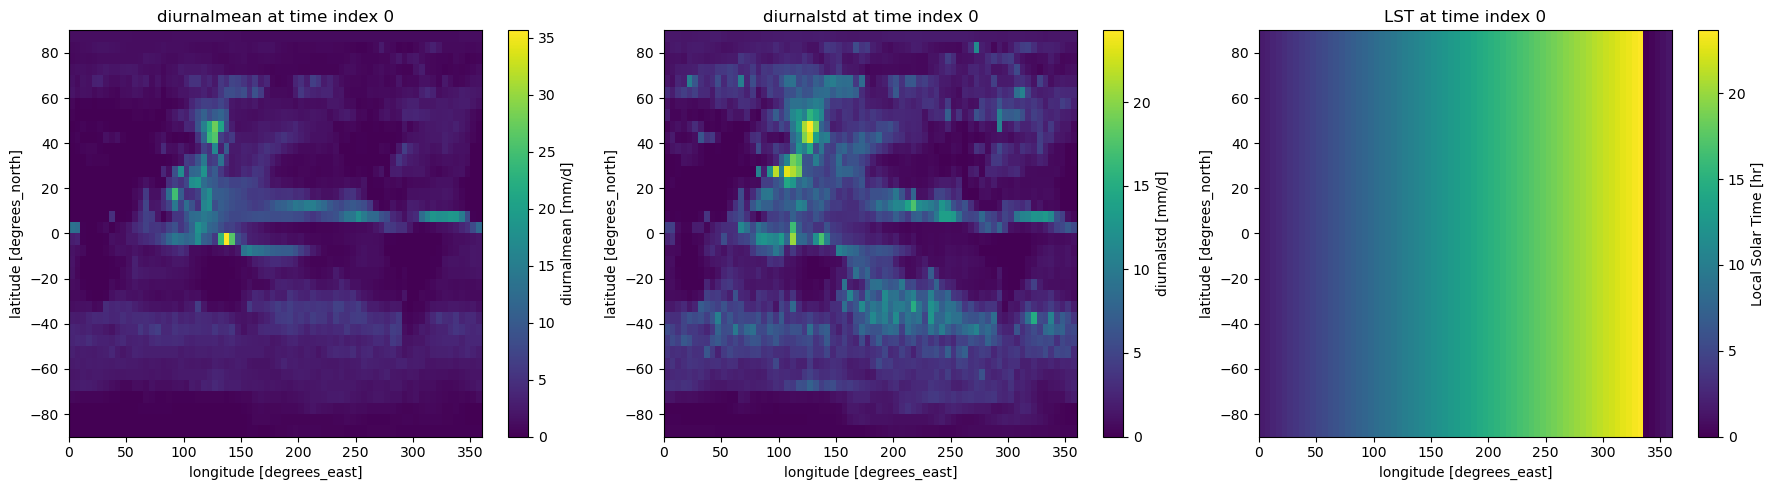

In [11]:
import matplotlib.pyplot as plt
import xarray as xr

itime = 0  # Change this to select a different time index

ncfile0 = "pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc"
varname0 = "diurnalmean"

ncfile1 = "pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc"
varname1 = "diurnalstd"

ncfile2 = "pr_IPSL-CM5A-LR_LocalSolarTimes.nc"
varname2 = "LST"

output_dir = demo_output_directory + "/diurnal/nc/"

ds0 = xr.open_dataset(output_dir + ncfile0)
ds1 = xr.open_dataset(output_dir + ncfile1)
ds2 = xr.open_dataset(output_dir + ncfile2)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))
ds0[varname0].isel(time=itime).plot(ax=ax0)
ax0.set_title(f"{varname0} at time index {itime}")
ds1[varname1].isel(time=itime).plot(ax=ax1)
ax1.set_title(f"{varname1} at time index {itime}")
ds2[varname2].isel(time=itime).plot(ax=ax2)
ax2.set_title(f"{varname2} at time index {itime}")
plt.tight_layout()
plt.show()

ds0.close()
ds1.close()
ds2.close()

These contain respectively the 1997-1999 mean diurnal cycle for July, the standard deviation of these results across individual years, and the local solar time. Results for each of these are available for the entire domain.

We can now generate ASCII files for composite diurnal cycle (w/	error	bars) at selected grid points using the `fourierDiurnalGridpoints.py` script.

In [12]:
%%bash
fourierDiurnalGridpoints.py -p basic_diurnal_fourier.py

LSTFILES: ['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_LocalSolarTimes.nc']
TMPL pr_IPSL-CM5A-LR_LocalSolarTimes.nc
Results sent to: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/ascii/pr_Jul_1997-1999_fourierDiurnalGridPoints.asc


This produces an ascii file: `pr_Jul_1997-1999_fourierDiurnalGridPoints.asc` 

## Standard Deviation of Hourly Values

Starting again from the *composite* results our diagram suggests we now compute the standard deviation of hourly values.

In [13]:
with open("basic_diurnal_std_hourly_mean.py") as f:
    print(f.read())

# output directory
results_dir = 'demo_output/diurnal/json'

# input directory which is actually the output of previous driver
modpath = 'demo_output/diurnal/nc'

# model to use
model = 'IPSL-CM5A-LR'
experiment = 'historical'
realization = 'r1i1p1'

# Month to use
month = 7

# Period
firstyear = 1997 # included
lastyear = 1999  # included

# Latitudes/longitudes to use
lat1 = -50.
lat2 = 50.
lon1 = 0.
lon2 = 360.

# Number of workers
num_workers = 4



In [14]:
%%bash
std_of_hourlyvalues.py -p basic_diurnal_std_hourly_mean.py

TEMPLATE NAME: pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc
Specifying latitude / longitude domain of interest ...
Preparing to write output to JSON file ...
Initializing dictionary of statistical results ...
['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1ba31ddb0>]
Specifying latitude / longitude domain of interest ...
Reading demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc
Shape = (8, 20, 72)
units = mm/d
Finding RMS area-average ...
For IPSL-CM5A-LR in Jul, average variance of hourly values = ( 4.85 mm/d)^2
Writing output to JSON file ...


INFO::2025-07-26 00:24::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_hourlymeans.json
2025-07-26 00:24:16,225 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_hourlymeans.json
2025-07-26 00:24:16,225 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_hourlymeans.json


done


This generated the following file:
    `pr_Jul_1997-1999_std_of_hourlymeans.json`
    
These results are used in Trenberth	et	al.	(2017). They are a measure of the intermittancy of hourly values, which puts “error bars” on the mean diurnal cycle.

Going back to the results of the *composite* we can now run `std_of_meandiurnalcycle.py` which can use the same input parameter file as the daily mean computation.

In [15]:
%%bash
std_of_meandiurnalcycle.py -p basic_diurnal_std_hourly_mean.py

TEMPLATE NAME: pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc
Specifying latitude / longitude domain of interest ...
Preparing to write output to JSON file ...
Initializing dictionary of statistical results ...
['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc']
PARAMS: [<pcmdi_metrics.diurnal.common.INPUT object at 0x1b83a9db0>]
Specifying latitude / longitude domain of interest ...
Reading demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc
Shape = (8, 20, 72)
units = mm/d
Finding standard deviation over first dimension (time of day) ...
  Shape = (20, 72)
Finding r.m.s. average over 2nd-3rd dimensions (area) ...
For IPSL-CM5A-LR in Jul, average variance of hourly values = ( 2.15 mm/d)^2
Writing output to JSON file ...
KEYS AT END: ['DISCLAIMER', 'REFERENCE', 'RESULTS']
REG MASK: {}


INFO::2025-07-26 00:24::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_meandiurnalcyc.json
2025-07-26 00:24:33,749 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_meandiurnalcyc.json
2025-07-26 00:24:33,749 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_std_of_meandiurnalcyc.json


done


This generates the following file: `pr_Jul_1997-1999_std_of_meandiurnalcyc.json`

## Fourier Analysis

Again starting from the *composite* results let's do the fourier analysis. This uses a new parameter file.

In [16]:
with open("basic_diurnal_fourierAllGrid.py") as f:
    print(f.read())

# output directory
results_dir = 'demo_output/diurnal/nc'

# input directory which is actually the output of previous driver
modpath = 'demo_output/diurnal/nc'

# model to use
model = 'IPSL-CM5A-LR'
experiment = 'historical'
realization = 'r1i1p1'

# Month to use
month = 7

# Period
firstyear = 1997 # included
lastyear = 1999  # included

# Number of workers
num_workers = 4



In [17]:
%%bash
fourierDiurnalAllGrid.py -p basic_diurnal_fourierAllGrid.py

modpath  demo_output/diurnal/nc
filename_template  pr_%(model)_%(month)_%(firstyear)-%(lastyear)_diurnal_avg.nc
filename_template_LST  pr_%(model)_LocalSolarTimes.nc
LSTFILES: ['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_LocalSolarTimes.nc']
TMPL pr_IPSL-CM5A-LR_LocalSolarTimes.nc
Reading demo_output/diurnal/nc/pr_IPSL-CM5A-LR_LocalSolarTimes.nc ... pr_IPSL-CM5A-LR_LocalSolarTimes.nc
IPSL-CM5A-LR
Reading time series of mean diurnal cycle ...
Input shapes:  (8, 36, 72) (8, 36, 72)
Getting latitude and longitude coordinates.
Taking fast Fourier transform of the mean diurnal cycle ...
Creating output arrays ...
Calling numpy FFT function ...
(8, 36, 72)
Converting from complex-valued FFT to real-valued amplitude and phase ...
  Output:
    cycmean (36, 72)
    maxvalue (3, 36, 72)
    tmax (3, 36, 72)
    cycmean type: <class 'numpy.ndarray'>
    maxvalue type: <class 'numpy.ndarray'>
    tmax type: <class 'numpy.ndarray'>
"Re-decorating" Fourier harmonics with grid info, etc., ...
  After de

This generates 3 files:

```
pr_IPSL-CM5A-LR_Jul_1997-1999_tmean.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_tS.nc
```


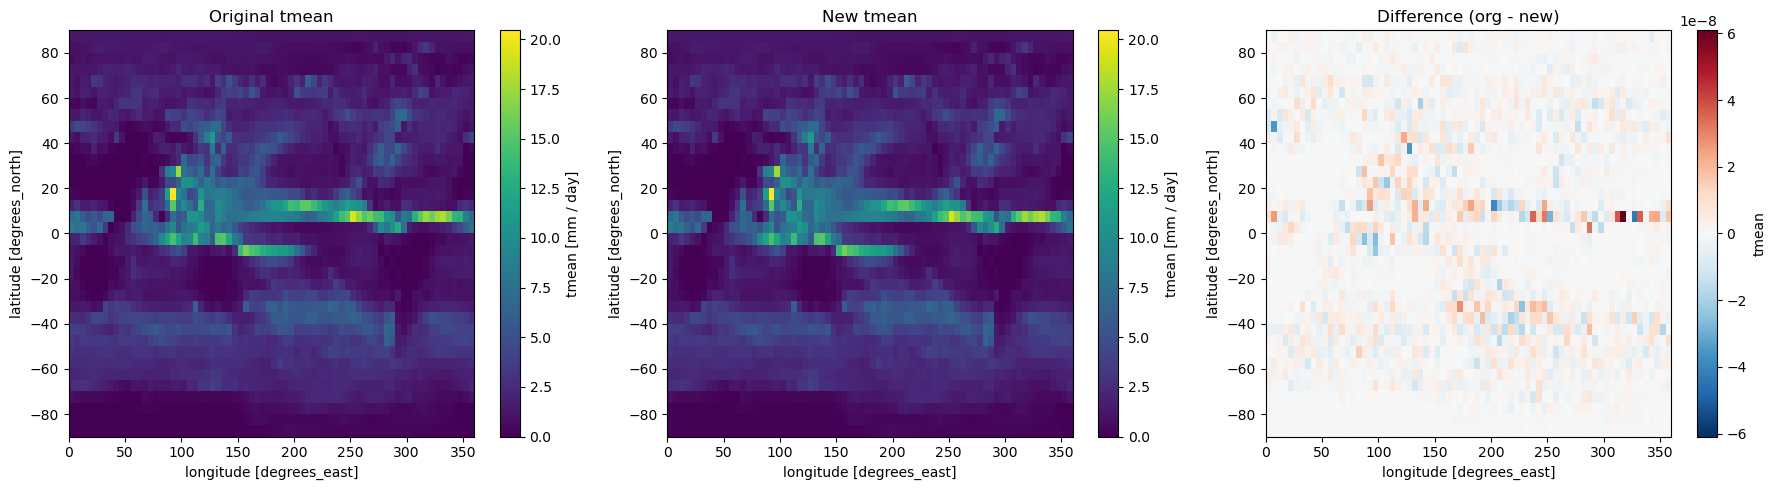

In [18]:
import matplotlib.pyplot as plt
import xarray as xr

ncfile = "pr_IPSL-CM5A-LR_Jul_1997-1999_tmean.nc"
varname = "tmean"

orgfile = f"demo_output/diurnal_org/nc/{ncfile}"
newfile = f"demo_output/diurnal/nc/{ncfile}"

ds_org = xr.open_dataset(orgfile)
ds_new = xr.open_dataset(newfile)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))
ds_org[varname].plot(ax=ax0)
ax0.set_title(f"Original {varname}")
ds_new[varname].plot(ax=ax1)
ax1.set_title(f"New {varname}")
(ds_org[varname] - ds_new[varname]).plot(ax=ax2)
ax2.set_title("Difference (org - new)")
plt.tight_layout()
plt.show()

ds_org.close()
ds_new.close()

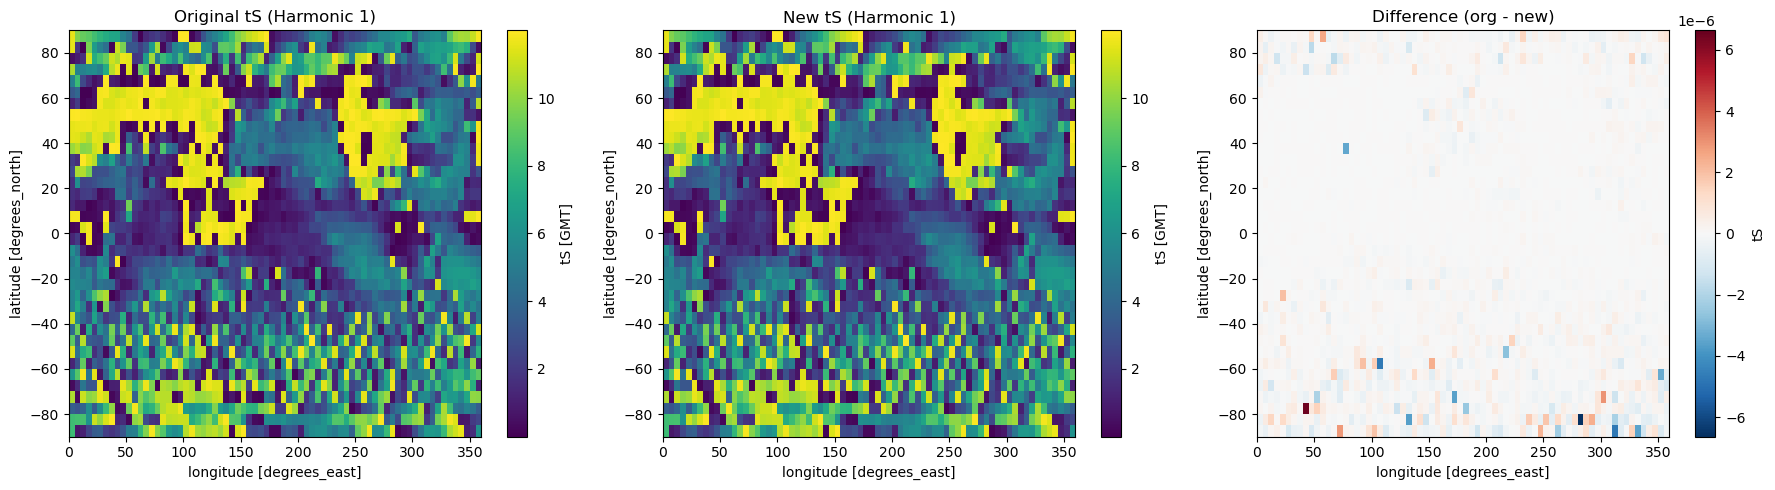

In [19]:
import matplotlib.pyplot as plt
import xarray as xr

ncfile = "pr_IPSL-CM5A-LR_Jul_1997-1999_tmean.nc"
varname = "tmean"


ncfile = "pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc"
index = 2
varname = "S"

ncfile = "pr_IPSL-CM5A-LR_Jul_1997-1999_tS.nc"
index = 1
varname = "tS"

orgfile = f"demo_output/diurnal_org/nc/{ncfile}"
newfile = f"demo_output/diurnal/nc/{ncfile}"

ds_org = xr.open_dataset(orgfile)
ds_new = xr.open_dataset(newfile)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))
ds_org[varname].isel(axis_0=index).plot(ax=ax0)
ax0.set_title(f"Original {varname} (Harmonic {index})")
ds_new[varname].isel(harmonic=index).plot(ax=ax1)
ax1.set_title(f"New {varname} (Harmonic {index})")
(ds_org[varname].isel(axis_0=index) - ds_new[varname].isel(harmonic=index)).plot(ax=ax2)
ax2.set_title("Difference (org - new)")
plt.tight_layout()
plt.show()

ds_org.close()
ds_new.close()

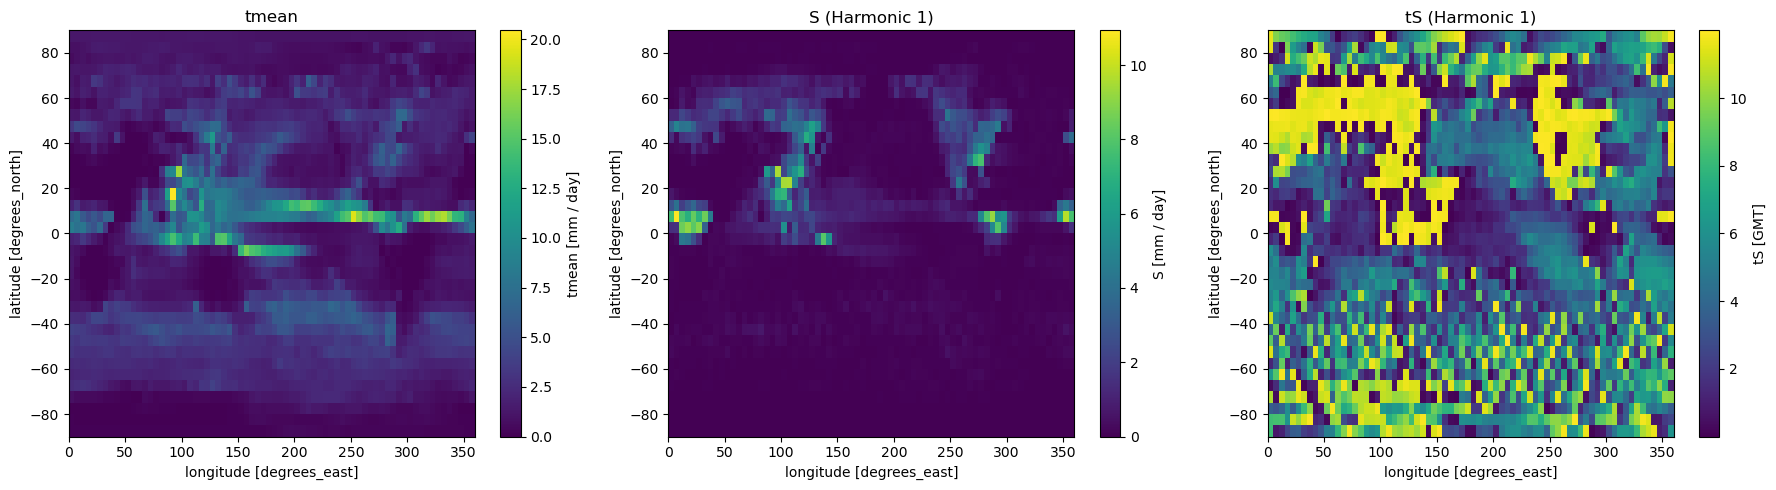

In [20]:
import matplotlib.pyplot as plt
import xarray as xr

index = 1  # Change this to select an interested harmonic index

ncfile0 = "pr_IPSL-CM5A-LR_Jul_1997-1999_tmean.nc"
varname0 = "tmean"

ncfile1 = "pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc"
varname1 = "S"

ncfile2 = "pr_IPSL-CM5A-LR_Jul_1997-1999_tS.nc"
varname2 = "tS"

output_dir = demo_output_directory + "/diurnal/nc/"

ds0 = xr.open_dataset(output_dir + ncfile0)
ds1 = xr.open_dataset(output_dir + ncfile1)
ds2 = xr.open_dataset(output_dir + ncfile2)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))
ds0[varname0].plot(ax=ax0)
ax0.set_title(f"{varname0}")
ds1[varname1].isel(harmonic=index).plot(ax=ax1)
ax1.set_title(f"{varname1} (Harmonic {index})")
ds2[varname2].isel(harmonic=index).plot(ax=ax2)
ax2.set_title(f"{varname2} (Harmonic {index})")
plt.tight_layout()
plt.show()

ds0.close()
ds1.close()
ds2.close()

We can now run the last script: `savg_fourierWrappedInOut.py`

In [21]:
%%bash
savg_fourier.py -p basic_diurnal_std_hourly_mean.py

Specifying latitude / longitude domain of interest ...
Preparing to write output to JSON file ...
Initializing dictionary of statistical results ...
TEMPLATE: pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc
['demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc']
Reading Amplitude from demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc ...


2025-07-26 00:24:48,697 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-26 00:24:48,697 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Reading Phase from demo_output/diurnal/nc/pr_IPSL-CM5A-LR_Jul_1997-1999_tS.nc ...


2025-07-26 00:24:48,749 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-26 00:24:48,749 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Reading sftlf from demo_output/diurnal/nc/cmip5.IPSL-CM5A-LR.historical.r0i0p0.fx.atm.fx.sftlf.*.latestX.xml ...
Failed reading sftlf from file (error was: list index out of range)
Creating one for you
  Global mean land fraction = 0.252
Area-averaging globally, over land only, and over ocean only ...
Converting singleton transient variables to plain floating-point numbers ...
Jul 1-harmonic amplitude, phase =   0.583 mm/d,   9.681 hrsLST averaged globally
Jul 1-harmonic amplitude, phase =   2.243 mm/d,  11.588 hrsLST averaged over land
Jul 1-harmonic amplitude, phase =   0.380 mm/d,   4.868 hrsLST averaged over ocean
Area-averaging globally, over land only, and over ocean only ...
Converting singleton transient variables to plain floating-point numbers ...
Jul 2-harmonic amplitude, phase =   0.569 mm/d,   0.159 hrsLST averaged globally
Jul 2-harmonic amplitude, phase =   1.554 mm/d,  11.905 hrsLST averaged over land
Jul 2-harmonic amplitude, phase =   0.252 mm/d,   0.694 hrsLST averag

INFO::2025-07-26 00:24::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_savg_DiurnalFourier.json
2025-07-26 00:24:54,833 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_savg_DiurnalFourier.json
2025-07-26 00:24:54,833 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/diurnal/json/pr_Jul_1997-1999_savg_DiurnalFourier.json


done


This creates the following file:

```
pr_Jul_1997-1999_savg_DiurnalFourier.json
```

In [22]:
import json
import pprint
output_json = demo_output_directory + "/diurnal/json/pr_Jul_1997-1999_savg_DiurnalFourier.json"
with open(output_json, 'r') as f:
    data = json.load(f)
    pprint.pprint(data)
    # or use below line to print with indentation
    # print(json.dumps(data, indent=4))

{'DISCLAIMER': 'USER-NOTICE: The results in this file were produced with the '
               'PMP v1.1 (https://github.com/PCMDI/pcmdi_metrics). They are '
               'for research purposes only. They are subject to ongoing '
               'quality control and change as the PMP software advances, '
               'interpolation methods are modified, observational data sets '
               'are updated, problems with model data are corrected, etc. Use '
               'of these results for research (presentation, publications, '
               'etc.) should reference: Gleckler, P. J., C. Doutriaux, P. J. '
               'Durack, K. E. Taylor, Y. Zhang, and D. N. Williams, E. Mason, '
               'and J. Servonnat (2016), A more powerful reality test for '
               'climate models, Eos, 97, doi:10.1029/2016EO051663. If any '
               'problems are uncovered in using these results please contact '
               'the PMP development team at pcmdi-metrics@llnl.gov\n'